In [225]:
from sklearn.datasets import load_iris
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Steps to the PCA algorithm:
1. Center the data: Subract the means along the dimension axis from the individual features of each data sample
2. Using the new centered matrix compute the covariance matrix
3. Find the eigenvalues and eigenvectors of the covariance matrix
4. Sort the eigenvectors by the eigenvalues from highest to lowest
5. Use the *d* first eigenvectors as principal components and concatenate them into one matrix
6. Perform matrix multiplication on the centered data matrix and the matrix containing principal components
7. The resulting matrix is the lower dimension representation of the original data
### Functions to be implmemented:
- center_data(X), parameters: X $\rightarrow$ "matrix representation of the data", return: X_centered $\rightarrow$ "centered matrix"
- cov_matrix(X), paramterers: X $\rightarrow$ "centered matrix", return: X_cov_matrix $\rightarrow$ "covariance matrix"
- compute_eigvals_eigvecs(X), parameters: X $\rightarrow$ "covariance matrix", return: eigvals, eigvecs $\rightarrow$ "tuple containing eigenvalues and eigenvectors"
- sort_eigvecs_by_eigvals(eigvals, eigvecs), parameters: eigvals, eigvecs $\rightarrow$ "eigenvalues and eigenvectors", return: sorted_eigvals, sorted_eigvecs $\rightarrow$ "tuple containing sorted eigenvalues and eigenvectors in descending order"
- pca(X, d), parameters: X, d $\rightarrow$ "original data and number of desired dimensions", return: pca_eigvecs, P $\rightarrow$ "tuple containing principle component vectors and lower dimensional representation of the data"

In [94]:
def center_data(X):
    X_centered = X - np.mean(X, axis=0)
    return X_centered

In [95]:
def cov_matrix(X):
    n = X.shape[0]
    return (1 / (n - 1)) * X.T @ X 

In [96]:
def compute_eigvals_eigvecs(X):
    X_centered = center_data(X)
    X_cov = cov_matrix(X_centered)
    eigvals, eigvecs = np.linalg.eig(X_cov)
    eigvals = eigvals.real
    eigvecs = eigvecs.real
    return eigvals, eigvecs
    

In [97]:
def sort_eigvecs_by_eigvals(eigvals, eigvecs):
    indices = np.argsort(eigvals, axis=0)[::-1]
    sorted_eigvals = eigvals[indices]
    sorted_eigvecs = eigvecs[indices]
    return sorted_eigvals, sorted_eigvecs

In [305]:
def pca(X, d):
    X_centered = center_data(X)
    X_cov_matrix = cov_matrix(X_centered)
    eigvals, eigvecs = compute_eigvals_eigvecs(X_cov_matrix)
    sorted_eigvals, sorted_eigvecs = sort_eigvecs_by_eigvals(eigvals, eigvecs)

    pca_eigvecs = sorted_eigvecs[:, :d]
    P = X_centered @ pca_eigvecs
    return pca_eigvecs, P
    

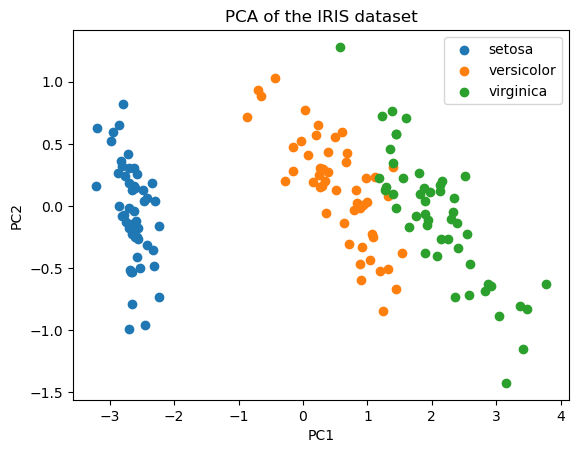

In [371]:
iris = load_iris()
X, y = iris.data, iris.target
species_names = iris.target_names
pca_eigvecs, P = pca(X, 2)
for i, name in enumerate(species_names):
    plt.scatter(P[y == i, 0], P[y == i, 1], label=name)

plt.legend()
plt.title("PCA of the IRIS dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

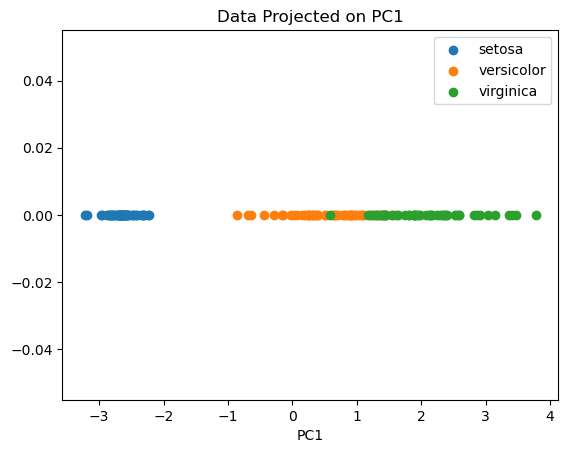

In [200]:
for i, name in enumerate(species_names):
    plt.scatter(P[y == i, 0], np.zeros((y == i).sum()), label=name)

plt.legend()
plt.title("Data Projected on PC1")
plt.xlabel("PC1")
plt.show()

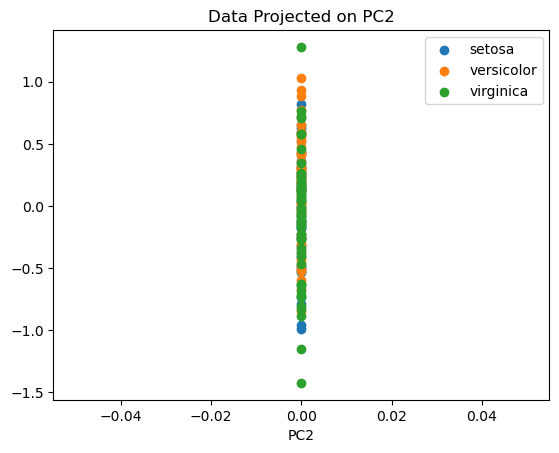

In [202]:
for i, name in enumerate(species_names):
    plt.scatter(np.zeros((y == i).sum()), P[y == i, 1], label=name)

plt.legend()
plt.title("Data Projected on PC2")
plt.xlabel("PC2")
plt.show()

### PCA for Data Compression:
PCA in addition to data analysis can also be used as a lossy compression algorithm. We reduce the image's dimensionality to our own choice of *d* and then reconstruct the image by projecting it into its original dimensions. By varying *d* we can see how the image's resolution increases or decreases when we use more or fewer dimensions respectively.

In [317]:
def pca_inverse(X, P, pca_eigvecs):
    mean = np.mean(X, axis=0)
    reconstructed = P @ pca_eigvecs.T + mean
    return reconstructed

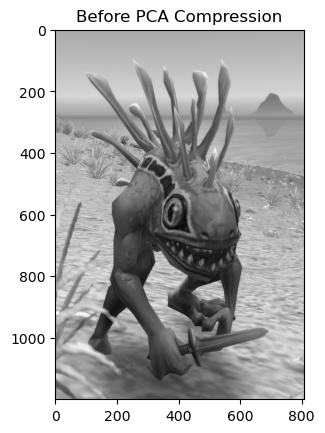

In [363]:
image = Image.open('murloc.jpg')
grayscale_image = image.convert('L')
plt.imshow(grayscale_image, cmap='grey')
plt.title("Before PCA Compression")
plt.show()

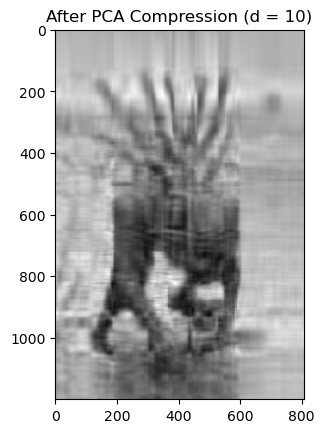

In [385]:
image_matrix = np.asarray(grayscale_image)
height, width = image_matrix.shape
d = 10
pca_eigvec, P = pca(image_matrix, d)
image_reconstructed = pca_inverse(image_matrix, P, pca_eigvec)
plt.imshow(image_reconstructed, cmap='grey')
plt.title(f"After PCA Compression (d = {d})")
plt.show()